## Project- Boston Polic Crime Report

### Topic: EDA for Boston Police Crime Report 2015 - 2024



In [3]:
# ! pip install seaborn matplotlib

# ! pip install --upgrade scikit-learn

# ! pip install folium


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Load the dataset
# file_path = '/mnt/data/Boston_Police_2015_2024.csv'
boston_police_data = pd.read_csv('Boston_Police_2015_2024.csv')

# Display the first few rows of the dataset and its summary information
boston_police_data.head(), boston_police_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366532 entries, 0 to 366531
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         366532 non-null  int64  
 1   OFFENSE_DESCRIPTION  366532 non-null  object 
 2   DISTRICT             366532 non-null  object 
 3   SHOOTING             366532 non-null  int64  
 4   OCCURRED_ON_DATE     366532 non-null  object 
 5   YEAR                 366532 non-null  int64  
 6   MONTH                366532 non-null  int64  
 7   DAY_OF_WEEK          366532 non-null  object 
 8   HOUR                 366532 non-null  int64  
 9   STREET               365884 non-null  object 
 10  Lat                  366532 non-null  float64
 11  Long                 366532 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 33.6+ MB


(   OFFENSE_CODE             OFFENSE_DESCRIPTION DISTRICT  SHOOTING  \
 0           413  ASSAULT - AGGRAVATED - BATTERY       B2         1   
 1           413  ASSAULT - AGGRAVATED - BATTERY       B2         1   
 2           413  ASSAULT - AGGRAVATED - BATTERY       B2         1   
 3           413  ASSAULT - AGGRAVATED - BATTERY       B2         1   
 4          3125                  WARRANT ARREST       B2         1   
 
          OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR        STREET  \
 0  2015-06-16 20:41:00+00  2015      6     Tuesday    20  LAWRENCE AVE   
 1  2015-06-16 20:41:00+00  2015      6     Tuesday    20  LAWRENCE AVE   
 2  2015-06-16 20:41:00+00  2015      6     Tuesday    20  LAWRENCE AVE   
 3  2015-06-19 21:20:00+00  2015      6      Friday    21      KERR WAY   
 4  2015-06-20 00:00:00+00  2015      6    Saturday     0     DUDLEY ST   
 
          Lat       Long  
 0  42.311611 -71.076256  
 1  42.311611 -71.076256  
 2  42.311611 -71.076256  
 3  42.33358

In [4]:
boston_police_data.describe()

,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR,Lat,Long
count,366532.000000,366532.000000,366532.000000,366532.000000,366532.000000,3.665320e+05,3.665320e+05
mean,2351.687192,0.015038,2020.953497,6.556661,12.782117,4.232242e+01,-7.108342e+01
std,1200.875046,0.121705,1.491880,3.405451,6.466615,1.040087e-01,1.689411e-01
min,100.000000,0.000000,2015.000000,1.000000,0.000000,1.330000e-07,-7.134947e+01
25%,1102.000000,0.000000,2020.000000,4.000000,9.000000,4.229756e+01,-7.109893e+01
50%,3005.000000,0.000000,2021.000000,7.000000,14.000000,4.232810e+01,-7.107766e+01
75%,3201.000000,0.000000,2022.000000,9.000000,18.000000,4.234889e+01,-7.106133e+01
max,99999.000000,1.000000,2024.000000,12.000000,23.000000,4.246141e+01,5.250000e-08


In [5]:
# Calculate the rate of crime per district by year
crime_rate_per_district_year = boston_police_data.groupby(['DISTRICT', 'YEAR']).size().unstack(fill_value=0)

# Show the result
crime_rate_per_district_year


YEAR,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
DISTRICT,,,,,,,,,,
A1,1,2,11,5,9350,6796,7333,7141,7901,336
A15,1,1,1,2,1830,1560,1359,1404,1265,63
A7,2,8,9,8,3285,3088,3187,3557,3692,207
B2,107,141,116,142,12589,10273,9691,9656,9674,459
B3,37,87,105,76,9387,7333,7123,6948,7284,368
C11,28,54,95,70,10742,8860,8940,8938,8550,383
C6,4,9,19,17,5891,5208,5498,5601,6076,278
D14,7,3,2,17,5585,4697,4883,5541,5447,248
D4,21,7,34,10,10776,9166,9006,9329,9900,508


<Figure size 1600x800 with 0 Axes>

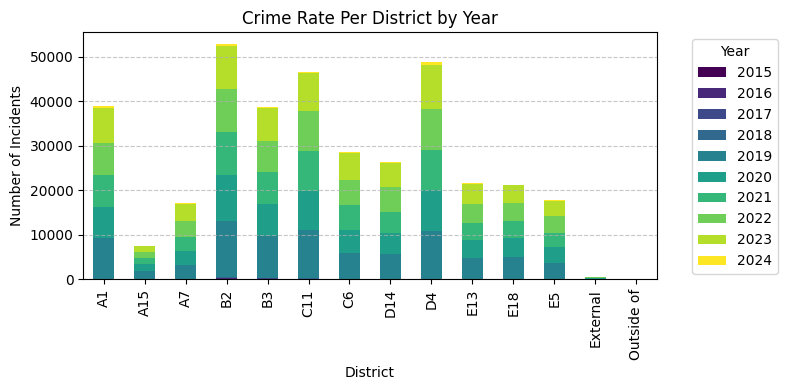

In [6]:
# Generate a bar chart for the crime rate per district by year
plt.figure(figsize=(16, 8))
crime_rate_per_district_year.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 4))
plt.title('Crime Rate Per District by Year')
plt.xlabel('District')
plt.ylabel('Number of Incidents')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Observations:
District B2 consistently shows the highest crime rates across the years, followed by districts D4 and C11.
There was a general increase in reported incidents from 2019 onwards in most districts, which might be due to various factors including changes in reporting mechanisms or actual increases in crime.
Data for 2024 seems to be partial as the numbers are significantly lower compared to other years.

### Rate of overall crime per hour

In [7]:
# Calculate the rate of overall crime per hour
crime_rate_per_hour = boston_police_data.groupby('HOUR').size()

# Show the result
crime_rate_per_hour


HOUR
0     25352
1      9617
2      8235
3      5292
4      3907
5      4164
6      5525
7      9915
8     14678
9     16483
10    18489
11    19057
12    22233
13    19426
14    19858
15    18946
16    22994
17    22925
18    21548
19    18989
20    17588
21    15816
22    14300
23    11195
dtype: int64

### Observations:
Peak Hours: The highest number of incidents occur around noon (12 PM) and in the late afternoon (4 PM - 6 PM). This might correspond with times when people are more active in public spaces, increasing opportunities for incidents.
Late Night to Early Morning: There is a significant drop in crime incidents during the late night to early morning hours (1 AM to 5 AM), which might be due to fewer people being outdoors during these hours.
Morning Rise: Starting from 6 AM, there is a gradual increase in crime rates, peaking around midday.
This hourly distribution can be useful for law enforcement to allocate resources efficiently based on the time-based trends in crime rates. 

### Chart for the hourly crime rate

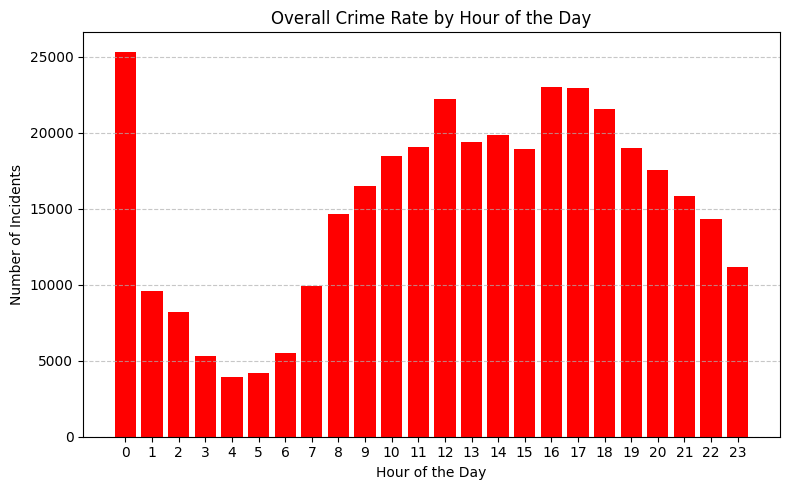

In [8]:
import matplotlib.pyplot as plt

# Create a bar chart for the hourly crime rate
plt.figure(figsize=(8, 5))
plt.bar(crime_rate_per_hour.index, crime_rate_per_hour.values, color='red')
plt.title('Overall Crime Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Incidents involving shootings

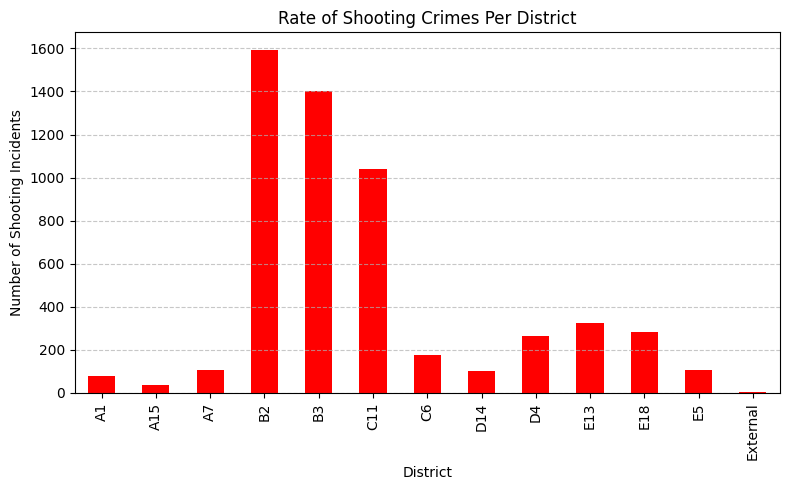

In [9]:
# Filter the dataset for incidents involving shootings
shooting_crimes = boston_police_data[boston_police_data['SHOOTING'] == 1]

# Calculate the rate of shooting crimes per district
shooting_rate_per_district = shooting_crimes.groupby('DISTRICT').size()

# Create a bar chart for the rate of shooting crimes per district
plt.figure(figsize=(8, 5))
shooting_rate_per_district.plot(kind='bar', color='red')
plt.title('Rate of Shooting Crimes Per District')
plt.xlabel('District')
plt.ylabel('Number of Shooting Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart above represents the rate of shooting crimes per district. This visualization helps in identifying which districts experience higher incidences of shooting-related crimes.

### Shooting crimes per district by hour

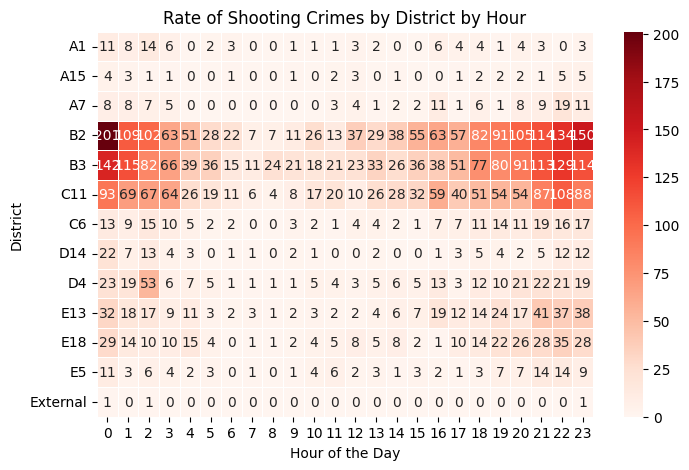

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the rate of shooting crimes per district by hour
shooting_rate_district_hour = shooting_crimes.groupby(['DISTRICT', 'HOUR']).size().unstack(fill_value=0)

# Generate a heatmap for the rate of shooting crimes per district by hour

plt.figure(figsize=(8, 5))
sns.heatmap(shooting_rate_district_hour, cmap='Reds', linewidths=.5, annot=True, fmt="d")
plt.title('Rate of Shooting Crimes by District by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('District')
plt.show()


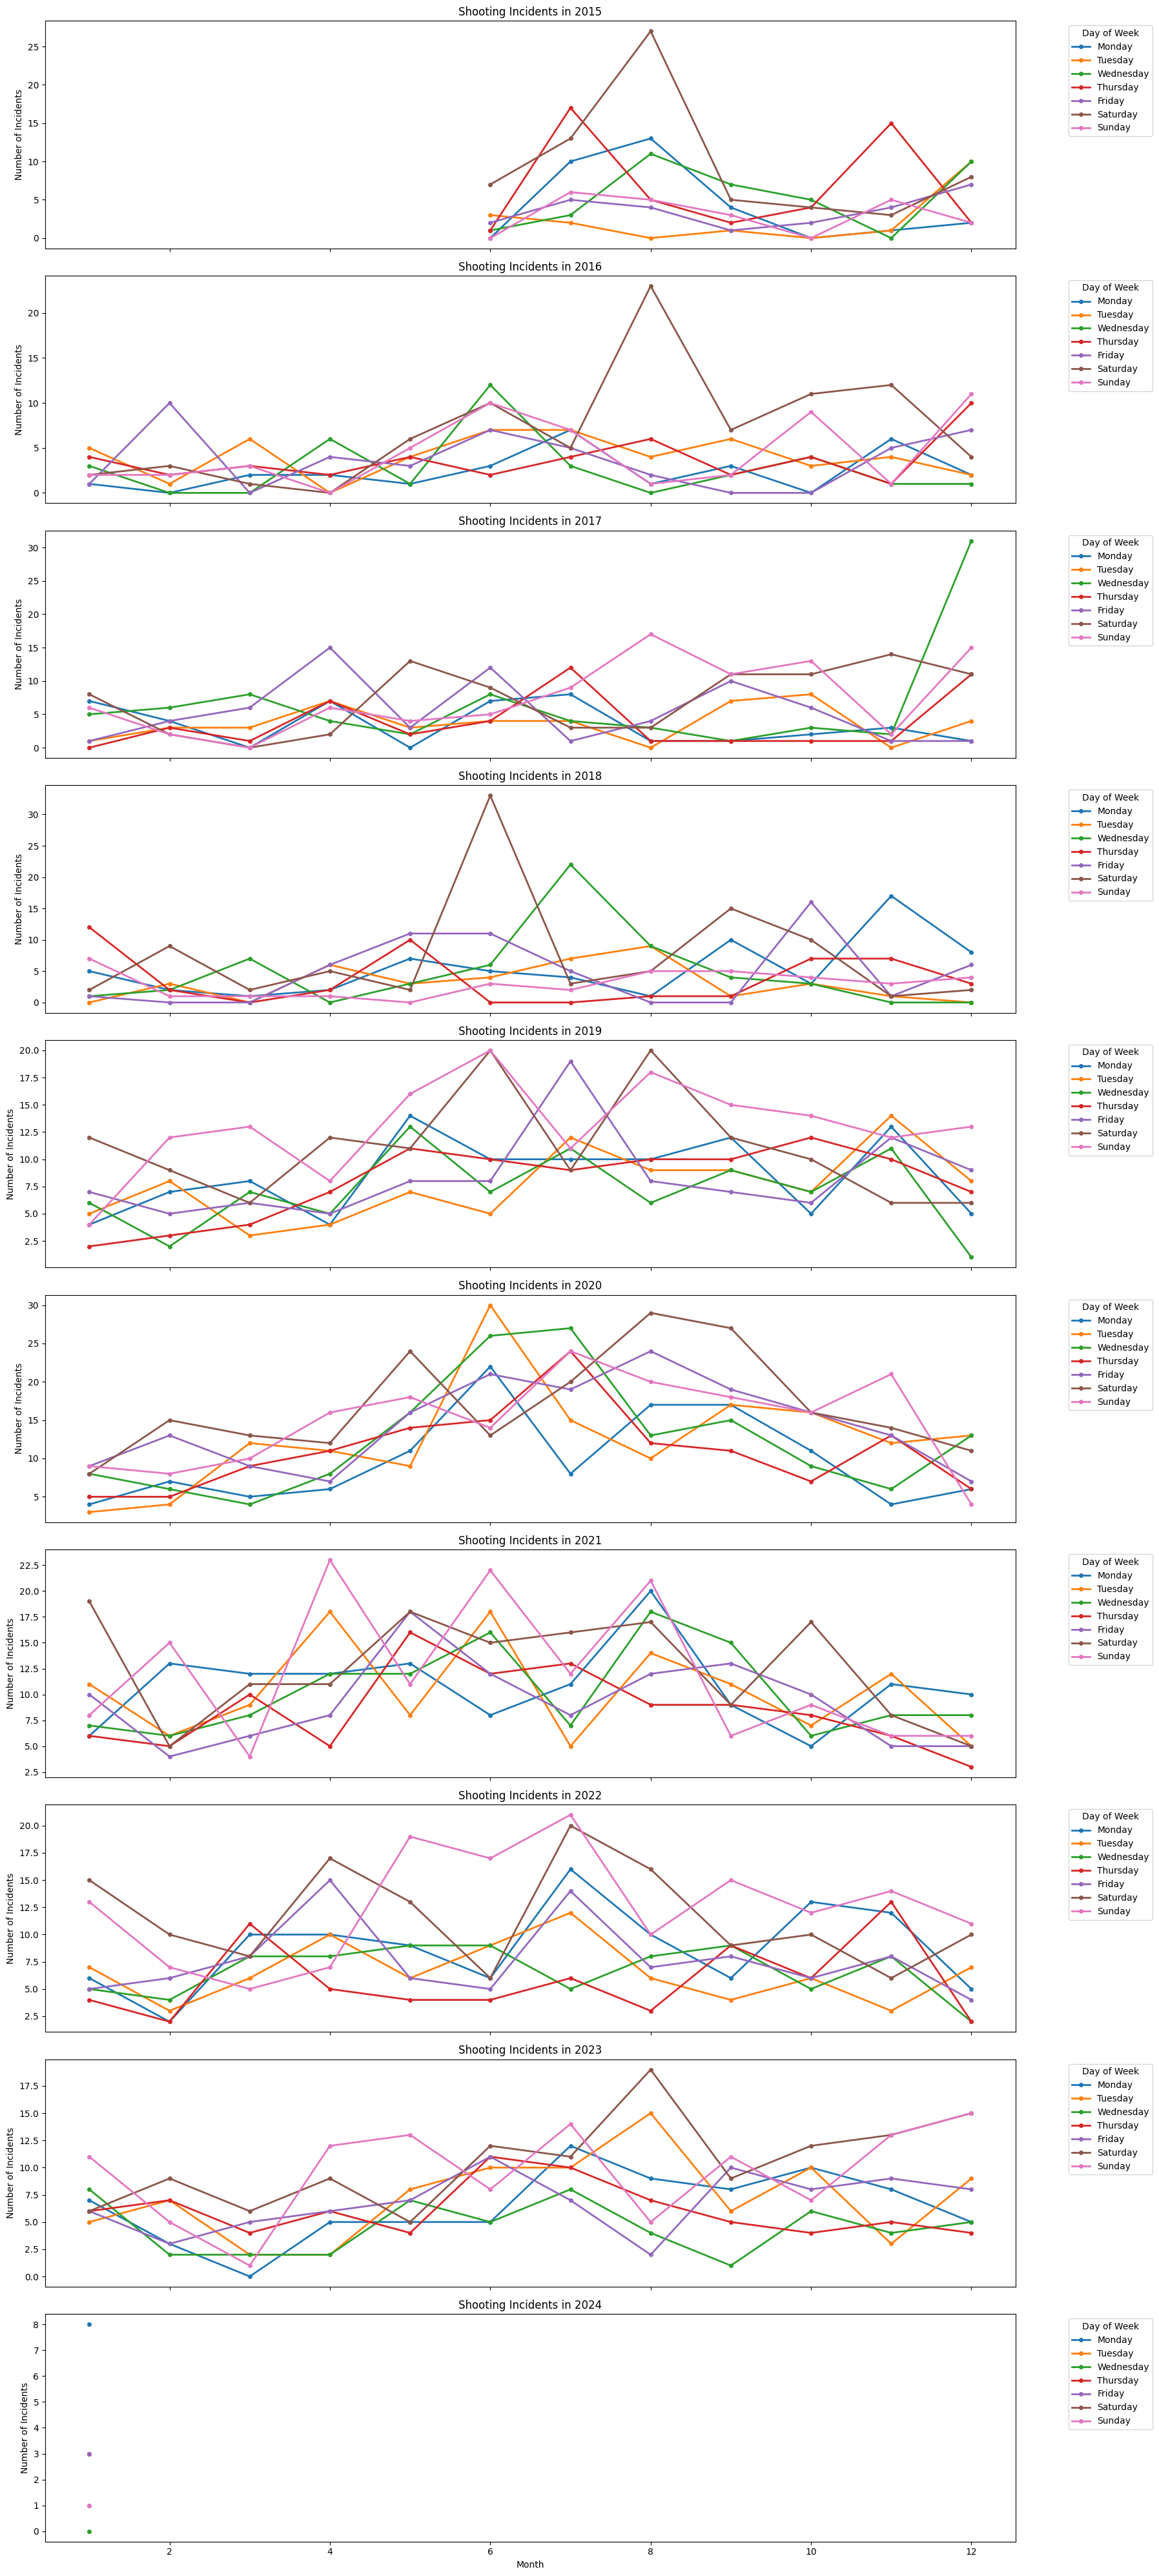

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # If you need to use seaborn styles or color palettes

# Assuming 'data' is your original dataset
shooting_crimes = boston_police_data[boston_police_data['SHOOTING'] == 1]

# Assuming 'shooting_crimes' is a DataFrame containing only the incidents that involved shootings
# Ensure 'shooting_crimes' is properly defined and filtered from your main dataset
shooting_rate_year_month_day = shooting_crimes.groupby(['YEAR', 'MONTH', 'DAY_OF_WEEK']).size().unstack(fill_value=0)

# Assuming that DataFrame is now correctly populated, here is the plotting code:
fig, axes = plt.subplots(nrows=len(shooting_rate_year_month_day.index.levels[0]), ncols=1, figsize=(18, 40), sharex=True)

for (year, group), ax in zip(shooting_rate_year_month_day.groupby(level=0), axes):
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    group = group.reindex(columns=days_order)  # Reordering days of the week for proper sequence in the plot
    group.droplevel(0).plot(kind='line', ax=ax, marker='o', markersize=4, linewidth=2)
    ax.set_title(f'Shooting Incidents in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Incidents')
    ax.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [14]:
# Count the occurrences of shooting and non-shooting incidents
shooting_counts = boston_police_data['SHOOTING'].value_counts()

# Display the counts
print("Counts of Shooting and Non-Shooting Incidents:")
print(shooting_counts)


Counts of Shooting and Non-Shooting Incidents:
SHOOTING
0    361020
1      5512
Name: count, dtype: int64


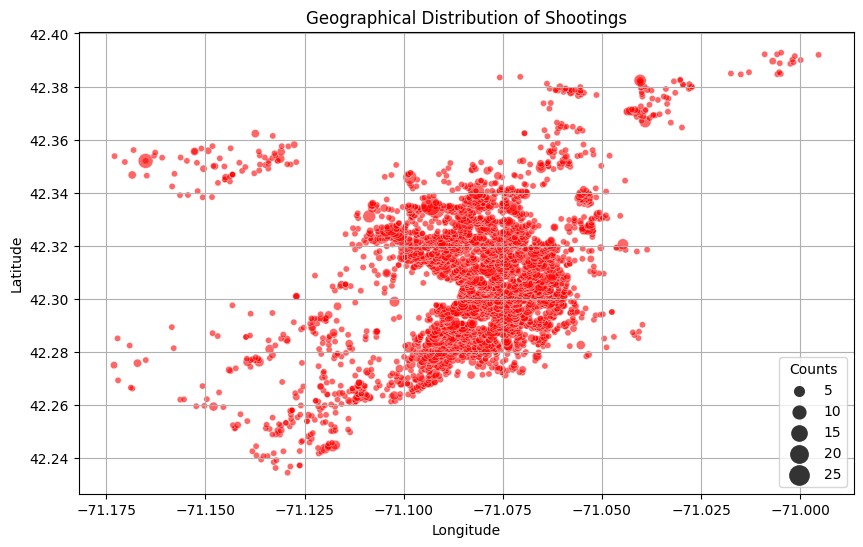

,Lat,Long,Counts
count,3332.000000,3332.000000,3332.000000
mean,42.307826,-71.083270,1.654262
std,0.026511,0.021950,1.697802
min,42.234528,-71.173076,1.000000
25%,42.289151,-71.092561,1.000000
50%,42.307242,-71.080633,1.000000
75%,42.323636,-71.070730,2.000000
max,42.392740,-70.995362,26.000000


In [23]:
# Filtering data to consider only entries where a shooting occurred
shooting_data = boston_police_data[boston_police_data['SHOOTING'] == 1]

# For geographical correlation, compute density of shootings per latitude and longitude
shooting_geo_density = shooting_data[['Lat', 'Long']].copy()
shooting_geo_density['Counts'] = 1  # add a count column to sum up for density calculation
shooting_geo_density = shooting_geo_density.groupby(['Lat', 'Long']).count().reset_index()

# Visualization: Plot the count of shootings per location
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', size='Counts', sizes=(20, 200), data=shooting_geo_density, alpha=0.6, color='red')
plt.title('Geographical Distribution of Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

shooting_geo_density.describe()

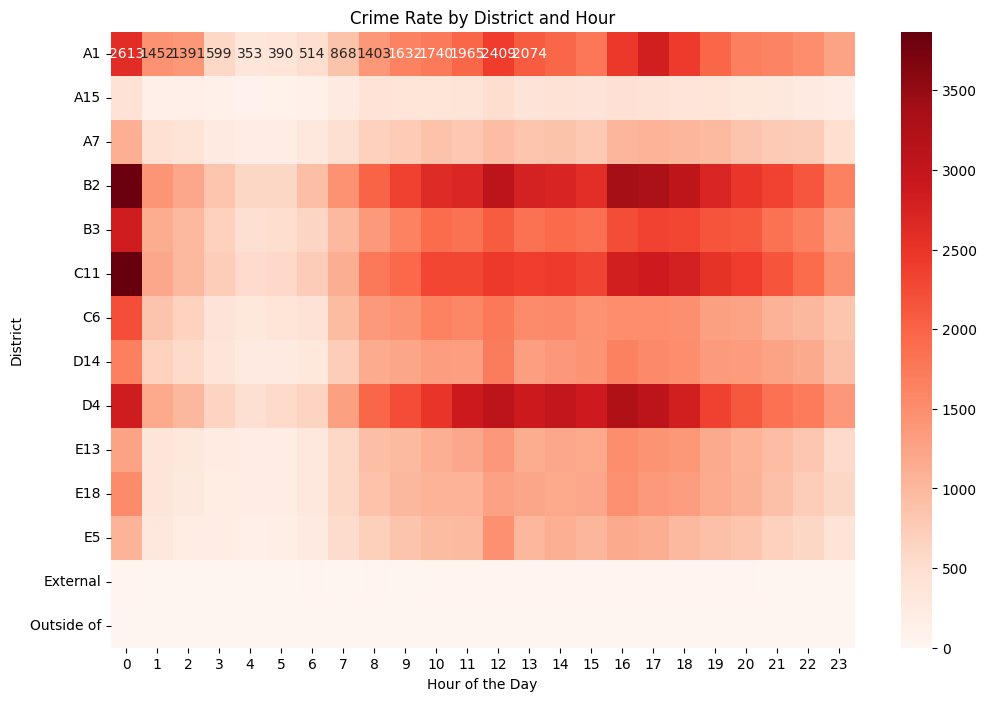

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by district and hour, count crimes
crime_rates = boston_police_data.groupby(['DISTRICT', 'HOUR']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_rates, annot=True, cmap="Reds", fmt="d")
plt.title('Crime Rate by District and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('District')
plt.show()


In [17]:
# end